In [10]:
import pandas as pd

# Charger les données
ratings = pd.read_csv("C:/Users/hkaic/PFA/Data/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
movies = pd.read_csv("C:/Users/hkaic/PFA/Data/u.item", sep="|", encoding="latin-1", header=None, usecols=[0, 1], names=["movie_id", "title"])

# Compter les films les plus notés
popular_movies = ratings['movie_id'].value_counts().reset_index()
popular_movies.columns = ['movie_id', 'count']

# Fusionner avec les titres
popular_movies = popular_movies.merge(movies, on='movie_id')

# Garder les 20 films les plus populaires
top_movies = popular_movies.sort_values(by='count', ascending=False).head(20)

print(top_movies)

    movie_id  count                             title
0         50    583                  Star Wars (1977)
1        258    509                    Contact (1997)
2        100    508                      Fargo (1996)
3        181    507         Return of the Jedi (1983)
4        294    485                  Liar Liar (1997)
5        286    481       English Patient, The (1996)
6        288    478                     Scream (1996)
7          1    452                  Toy Story (1995)
8        300    431              Air Force One (1997)
9        121    429     Independence Day (ID4) (1996)
10       174    420    Raiders of the Lost Ark (1981)
11       127    413             Godfather, The (1972)
12        56    394               Pulp Fiction (1994)
13         7    392             Twelve Monkeys (1995)
14        98    390  Silence of the Lambs, The (1991)
15       237    384              Jerry Maguire (1996)
16       117    378                  Rock, The (1996)
17       172    367   Empire

In [ ]:
#Version app.py 1.0
'''
import streamlit as st
import json
import os

# Fichier pour stocker les utilisateurs
USER_FILE = "users.json"

# Charger ou initialiser les utilisateurs
if os.path.exists(USER_FILE):
    with open(USER_FILE, "r") as f:
        users = json.load(f)
else:
    users = {"alice": "password123", "bob": "securepass"}

# Sauvegarder les utilisateurs
def save_users():
    with open(USER_FILE, "w") as f:
        json.dump(users, f)

# Choix de l’action
mode = st.sidebar.selectbox("Choisissez une action", ["🔑 Connexion", "🆕 Inscription"])

# Connexion
if mode == "🔑 Connexion":
    st.title("🎬 Movie Recommender - Login")
    st.subheader("Veuillez vous connecter")

    username = st.text_input("Nom d'utilisateur")
    password = st.text_input("Mot de passe", type="password")

    if st.button("Se connecter"):
        if username in users and users[username] == password:
            st.success(f"Bienvenue {username} 👋")
            st.session_state["logged_in"] = True
            st.session_state["username"] = username
        else:
            st.error("Nom d'utilisateur ou mot de passe incorrect.")

# Inscription
elif mode == "🆕 Inscription":
    st.title("📝 Création de compte")
    new_username = st.text_input("Choisissez un nom d'utilisateur")
    new_password = st.text_input("Choisissez un mot de passe", type="password")

    if st.button("Créer le compte"):
        if new_username in users:
            st.warning("Ce nom d'utilisateur existe déjà.")
        elif new_username == "" or new_password == "":
            st.warning("Tous les champs sont obligatoires.")
        else:
            users[new_username] = new_password
            save_users()
            st.success("Compte créé avec succès ! Vous pouvez maintenant vous connecter.")



import pandas as pd

# Charger les données
ratings = pd.read_csv("C:/Users/hkaic/PFA/Data/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
movies = pd.read_csv("C:/Users/hkaic/PFA/Data/u.item", sep="|", encoding="latin-1", header=None, usecols=[0, 1], names=["movie_id", "title"])

# Compter les films les plus notés
popular_movies = ratings['movie_id'].value_counts().reset_index()
popular_movies.columns = ['movie_id', 'count']

# Fusionner avec les titres
popular_movies = popular_movies.merge(movies, on='movie_id')

# Garder les 20 films les plus populaires
top_movies = popular_movies.sort_values(by='count', ascending=False).head(20)





if st.session_state.get("logged_in", False):
    st.title("🎥 Notation initiale")

    if "user_ratings" not in st.session_state:
        st.session_state.user_ratings = {}

    st.subheader("Notez au moins 5 films pour commencer à recevoir des recommandations")

    for i, row in top_movies.head(10).iterrows():
        title = row['title']
        movie_id = row['movie_id']
        rating = st.slider(f"{title}", 1, 5, key=f"rating_{movie_id}")
        st.session_state.user_ratings[movie_id] = rating

    # Compter les films notés
    rated_count = sum(1 for r in st.session_state.user_ratings.values() if r > 0)

    if rated_count >= 5:
        st.success(f"✅ {rated_count} films notés. Prêt pour les recommandations.")
        if st.button("Continuer vers les recommandations"):
            st.session_state["initial_ratings_done"] = True
    else:
        st.warning("⛔ Veuillez noter au moins 5 films pour continuer.")

'''

In [ ]:
'''
# Initialisation de session
if "logged_in" not in st.session_state:
    st.session_state["logged_in"] = False

# Page principale
if not st.session_state["logged_in"]:
    show_login_page()
elif not st.session_state.get("initial_ratings_done", False):
    show_rating_page()
else:
    st.title(f"🎯 Bienvenue {st.session_state['username']}")
    st.info("La page des recommandations arrive ici.")
'''

In [2]:
from tensorflow.keras.models import load_model

model = load_model("C:/Users/hkaic/PFA/mlp_model.keras")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ item_input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ user_embedding (Embedding)    │ (None, 1, 50)             │          47,150 │ user_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ item_embedding (Embedding)    │ (None, 1, 50)             │          84,100 │ item_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dot (Dot)                     │ (None, 1, 1)              │               0 │ user_embedding[0][0],      │
│                               │                           │                 │ item_embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 1)                 │               0 │ dot[0][0]                  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 131,250 (512.70 KB)

 Trainable params: 131,250 (512.70 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.models import load_model
import numpy as np

model = load_model("C:/Users/hkaic/PFA/mlp_model.keras")
import pandas as pd

ratings = pd.read_csv("data/new_ratings.csv")

# Choisir un user_id
user_id = 944

# Vérifier son user_idx
user_idx = ratings[ratings["user_id"] == user_id]["user_idx"].iloc[0]

# Identifier les item_idx qu’il n’a pas notés
all_items = ratings["item_idx"].unique()
rated_items = ratings[ratings["user_id"] == user_id]["item_idx"].unique()
unrated_items = np.setdiff1d(all_items, rated_items)

print("user_idx:", user_idx)
print("Items non notés:", unrated_items[:5])

user_idx: 943
Items non notés: []


In [9]:
# charger u.data
df_base = pd.read_csv("data/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
df_base = df_base[["user_id", "movie_id", "rating"]]

# charger new_ratings.csv
df_new = pd.read_csv("data/new_ratings.csv")[["user_id", "movie_id", "rating"]]

# fusion
df_full = pd.concat([df_base, df_new], ignore_index=True)

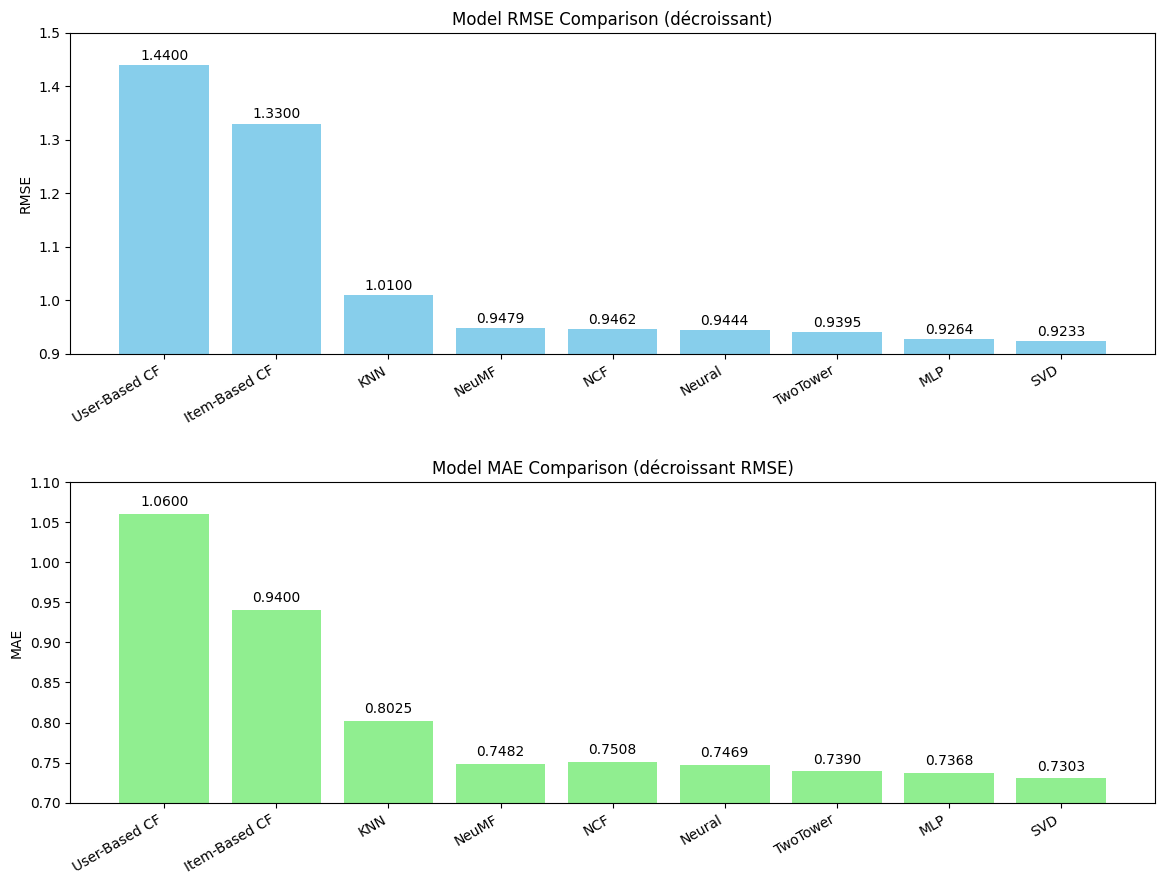

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Noms des modèles
models = ["TwoTower", "NCF", "NeuMF", "Item-Based CF", "User-Based CF",
          "MLP", "SVD", "Neural", "KNN"]

# RMSE des modèles
rmse_values = [0.9395, 0.9462, 0.9479, 1.3300, 1.4400,
               0.9264, 0.9233, 0.9444, 1.0100]

# MAE des modèles
mae_values = [0.7390, 0.7508, 0.7482, 0.9400, 1.0600,
              0.7368, 0.7303, 0.7469, 0.8025]

# Combine modèles + RMSE + MAE
data = list(zip(models, rmse_values, mae_values))
# Tri par RMSE décroissant
data_sorted = sorted(data, key=lambda x: x[1], reverse=True)

# Séparation des valeurs triées
models_sorted, rmse_sorted, mae_sorted = zip(*data_sorted)

# Positions des modèles
x = np.arange(len(models_sorted))

# Création des deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4)

# RMSE
ax1.bar(x, rmse_sorted, color='skyblue')
ax1.set_title("Model RMSE Comparison (décroissant)")
ax1.set_ylabel("RMSE")
ax1.set_ylim(0.9, 1.5)
ax1.set_xticks(x)
ax1.set_xticklabels(models_sorted, rotation=30, ha='right')
for i, v in enumerate(rmse_sorted):
    ax1.text(i, v + 0.01, f"{v:.4f}", ha='center')

# MAE
ax2.bar(x, mae_sorted, color='lightgreen')
ax2.set_title("Model MAE Comparison (décroissant RMSE)")
ax2.set_ylabel("MAE")
ax2.set_ylim(0.7, 1.1)
ax2.set_xticks(x)
ax2.set_xticklabels(models_sorted, rotation=30, ha='right')
for i, v in enumerate(mae_sorted):
    ax2.text(i, v + 0.01, f"{v:.4f}", ha='center')

# Affichage
plt.show()